# PCA - Principal Component Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("pca_iris.data")

In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.columns=["sepal_length","sepal_width","petal_lenght","petal_width","target"]

In [5]:
df.head()

,sepal_length,sepal_width,petal_lenght,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
x=df[["sepal_length","sepal_width","petal_lenght","petal_width"]]

In [7]:
y=df[["target"]]

In [8]:
x=StandardScaler().fit_transform(x)

In [9]:
x[0:5]

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ]])

# PCA

In [10]:
pca=PCA(n_components=2)
pca_x=pca.fit_transform(x)
pca_df=pd.DataFrame(data=pca_x,columns= ["principal_component_1","principal_component_2"])

In [11]:
pca_df.head()

,principal_component_1,principal_component_2
0,-2.107950,-0.644276
1,-2.387971,-0.305833
2,-2.324879,-0.562923
3,-2.405086,0.687591
4,-2.083204,1.530252


In [12]:
final_df = pd.concat([pca_df,y],axis=1)

In [13]:
final_df.head()

,principal_component_1,principal_component_2,target
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa


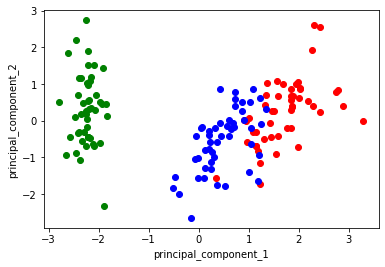

In [14]:
df_setosa=final_df[df["target"]=="Iris-setosa"]
df_virginica=final_df[df["target"]=="Iris-virginica"]
df_versicolor=final_df[df["target"]=="Iris-versicolor"]
plt.scatter(df_setosa["principal_component_1"],df_setosa["principal_component_2"],color="green")
plt.scatter(df_virginica["principal_component_1"],df_virginica["principal_component_2"],color="red")
plt.scatter(df_versicolor["principal_component_1"],df_versicolor["principal_component_2"],color="blue")
plt.xlabel("principal_component_1")
plt.ylabel("principal_component_2")
plt.show()

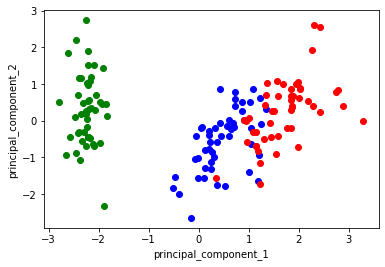

In [15]:
targets=["Iris-setosa","Iris-versicolor","Iris-virginica"]
colors=["g","b","r"]
plt.xlabel("principal_component_1")
plt.ylabel("principal_component_2")
for i,j in zip(targets,colors):
    df_for=final_df[df.target==i]
    plt.scatter(df_for["principal_component_1"],df_for["principal_component_2"],color=j)

In [16]:
pca.explained_variance_ratio_

array([0.72620033, 0.23147407])

In [17]:
pca.explained_variance_ratio_.sum()

0.9576744018556447